<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


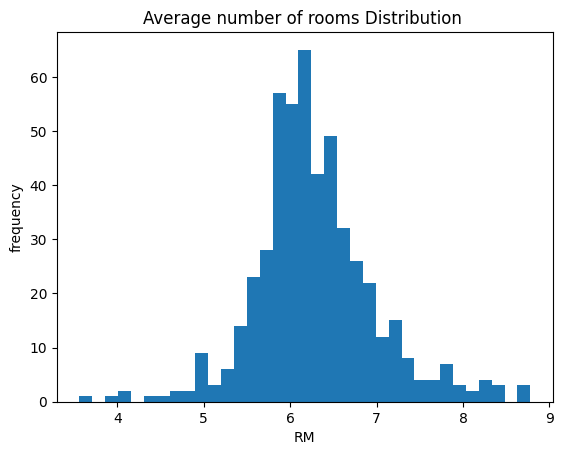

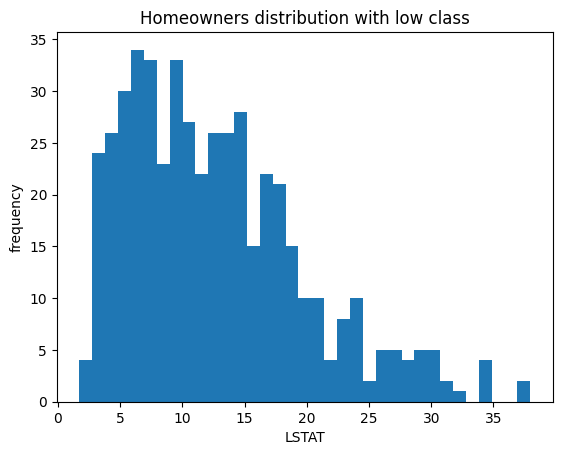

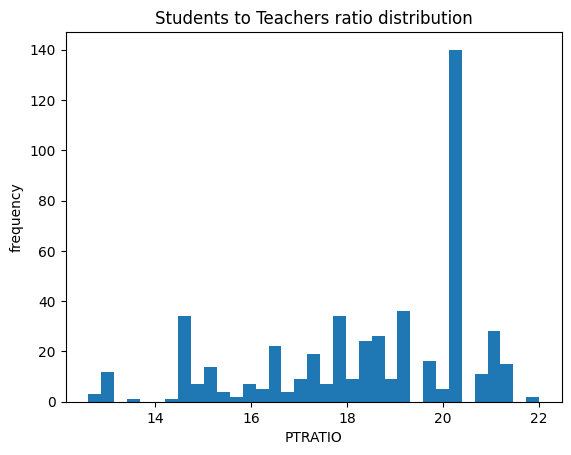

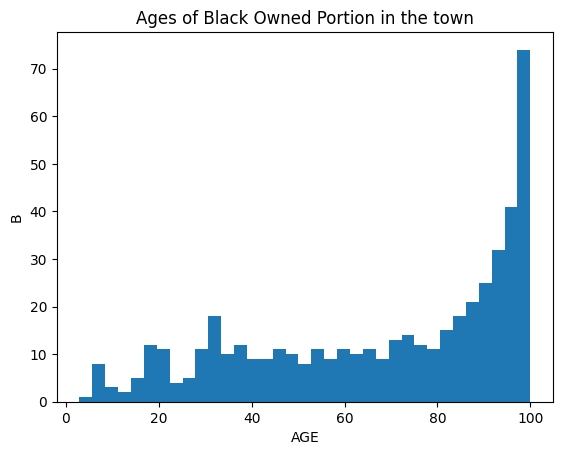

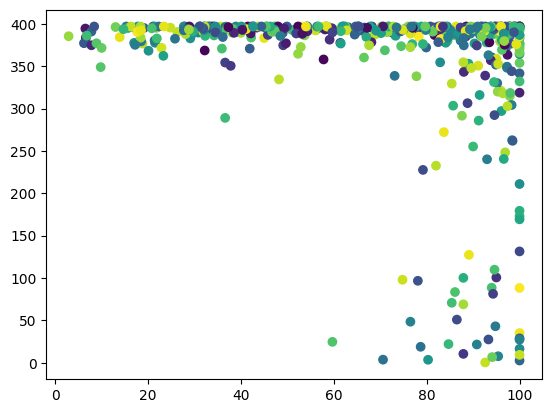

    SPECS         SCORE
9     TAX  14817.836927
1      ZN   5817.411645
0    CRIM   5332.588364
11      B   3340.486412
6     AGE   2201.715129
8     RAD   1445.257647
12  LSTAT   1329.940743
2   INDUS    826.590604


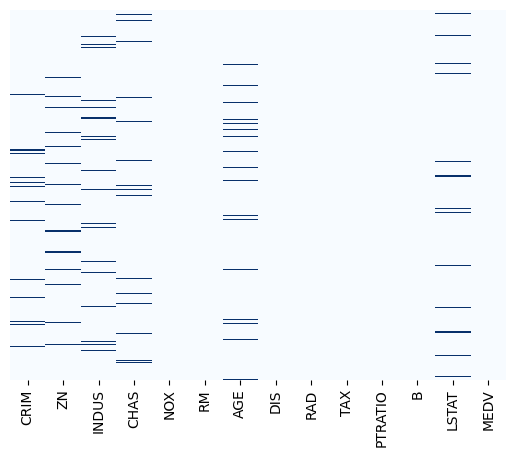

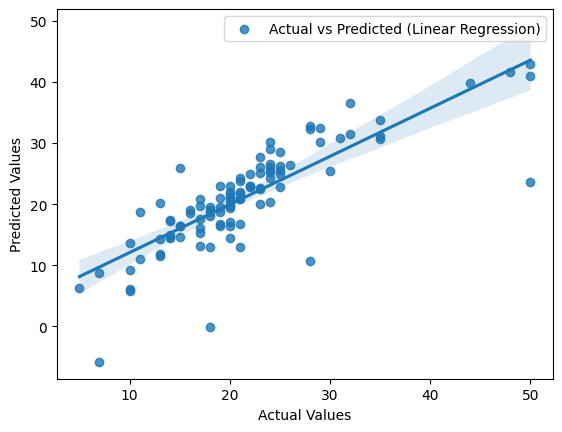

Training Accuracy (Linear Regression): 74.14093758499156
Testing Accuracy (Linear Regression): 65.48294387011876
Model Accuracy (Linear Regression): 72.71786211937822


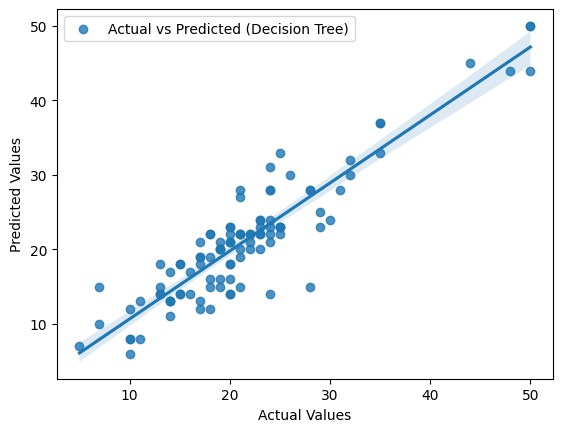

Training Accuracy (Decision Tree): 100.0
Testing Accuracy (Decision Tree): 82.92548327078931
Model Accuracy (Decision Tree): 97.02546756864305


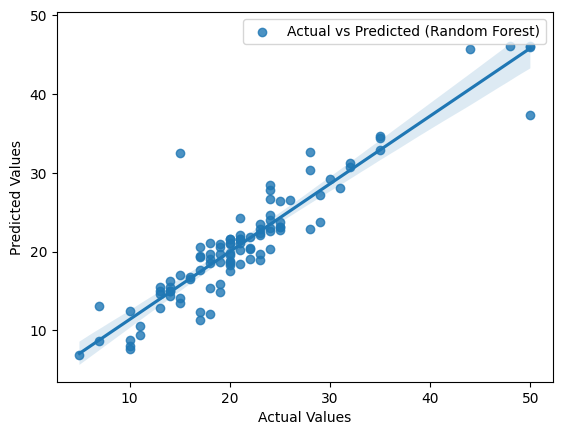

Training Accuracy (Random Forest): 97.22173746071175
Testing Accuracy (Random Forest): 86.22719892150988
Model Accuracy (Random Forest): 95.31554756084685


In [1]:
    import numpy as np
    import pandas as pd
    
    import seaborn as sns
    import matplotlib.pyplot as plt
    
    from sklearn.feature_selection import SelectKBest
    from sklearn.feature_selection import chi2
    from sklearn import model_selection
    from sklearn.metrics import mean_squared_error, r2_score
    
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.tree import DecisionTreeRegressor
    from sklearn.ensemble import RandomForestRegressor
    
    import math
    
    df = pd.read_csv("C:\Users\suyas\OneDrive\Desktop\ML\archive\HousingData.csv")
    
    df.head()

    df.info()

    df.shape

    df.describe()

    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.hist(df['RM'], bins = 35)
    plt.title("Average number of rooms Distribution ")
    plt.xlabel("RM")
    plt.ylabel("frequency")
    plt.show()
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.hist(df['LSTAT'], bins = 35)
    plt.title("Homeowners distribution with low class")
    plt.xlabel("LSTAT")
    plt.ylabel("frequency")
    plt.show()
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.hist(df['PTRATIO'], bins = 35)
    plt.title("Students to Teachers ratio distribution")
    plt.xlabel("PTRATIO")
    plt.ylabel("frequency")
    plt.show()
    fig=plt.figure()
    ax=fig.add_subplot(1, 1, 1)
    ax.hist(df['AGE'], bins = 35)
    plt.title("Ages of Black Owned Portion in the town")
    plt.xlabel("AGE")
    plt.ylabel("B")
    plt.show()
    N = 506
    x = df.AGE
    y = df.B
    colors = np.random.rand(N)

    plt.scatter(x, y, c=colors)
    plt.show()
    sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Blues')
    
    df = df.fillna(df.mean())
    df.isnull().sum()

    df.rename(columns={'MEDV':'PRICE'}, inplace = True)

    corr = df.corr()
    corr.shape
    df.shape
    X = df.iloc[:,0:13]
    y = df.iloc[:,-1]
    
    y = np.round(df['PRICE'])

    bestfeatures = SelectKBest(score_func=chi2)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)

    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['SPECS','SCORE']
    featureScores
    print(featureScores.nlargest(8,'SCORE'))

    plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model1 = LinearRegression()
model1.fit(X_train, y_train)

model2 = DecisionTreeRegressor()
model2.fit(X_train, y_train)

model3 = RandomForestRegressor()
model3.fit(X_train, y_train)

y_pred_lr = model1.predict(X_test)
y_pred_dt = model2.predict(X_test) 
y_pred_rf = model3.predict(X_test)  

y_pred_lr = model1.predict(X_test)
sns.regplot(x=y_test, y=y_pred_lr, label='Actual vs Predicted (Linear Regression)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("Training Accuracy (Linear Regression):", model1.score(X_train, y_train) * 100)
print("Testing Accuracy (Linear Regression):", model1.score(X_test, y_test) * 100)
print("Model Accuracy (Linear Regression):", r2_score(y, model1.predict(X)) * 100)

y_pred_dt = model2.predict(X_test) 
sns.regplot(x=y_test, y=y_pred_dt, label='Actual vs Predicted (Decision Tree)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("Training Accuracy (Decision Tree):", model2.score(X_train, y_train) * 100)
print("Testing Accuracy (Decision Tree):", model2.score(X_test, y_test) * 100)
print("Model Accuracy (Decision Tree):", r2_score(y, model2.predict(X)) * 100)

y_pred_rf = model3.predict(X_test) 
sns.regplot(x=y_test, y=y_pred_rf, label='Actual vs Predicted (Random Forest)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

print("Training Accuracy (Random Forest):", model3.score(X_train, y_train) * 100)
print("Testing Accuracy (Random Forest):", model3.score(X_test, y_test) * 100)
print("Model Accuracy (Random Forest):", r2_score(y, model3.predict(X)) * 100)